# Adidas vs Nike: Sneaker Comparison through Data and Opinion Mining

## Team Members
- Faiza Abdullah
- Win Aung
- Violetta Basden
- Annette Bazan

## Problem Statement
The project aims to compare Adidas and Nike sneakers using data and opinion mining techniques. By analyzing various attributes of sneakers from both brands, the goal is to identify patterns and insights that differentiate the two brands.

## Objectives
- Analyze pricing strategies of Adidas and Nike sneakers.
- Examine customer reviews and ratings to understand consumer sentiment.
- Investigate discount patterns and their impact on sales.
- Compare brand differences in terms of product offerings and customer feedback.

## Dataset Description
- **Product Name**: The name of the sneaker.
- **Product ID**: A unique identifier for each product.
- **Listing Price**: The original price of the sneaker.
- **Sale Price**: The discounted price, if applicable.
- **Discount**: The percentage or amount of discount applied.
- **Brand**: The brand of the sneaker (Adidas or Nike).
- **Rating**: The average customer rating for the sneaker.
- **Reviews**: The number of customer reviews for the sneaker.

In [26]:
# Importing General libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the dataset
df = pd.read_csv("sneakers.csv")
df_copy = df.copy()  # make a backup copy

In [5]:
# Check copy
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


In [7]:
# more info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [3]:
# Statistical summary
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [6]:
# Attributes
print('Shape of df:',df.shape)
print('total columns are:',df.columns)
print('df data types:',df.dtypes)
print('total size of df:',df.size)
print('total dimensions:',df.ndim)

Shape of df: (3268, 8)
total columns are: Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')
df data types: Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object
total size of df: 26144
total dimensions: 2


In [8]:
#NaN examine
df.isnull().sum()
df.duplicated().sum()

88

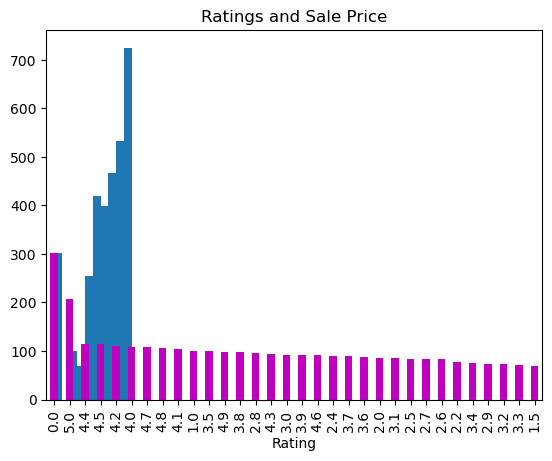

In [16]:
# Univariate
plt.hist(df['Rating'])
df['Rating'].value_counts().plot(x=df['Sale Price'], kind='bar', color='m')
plt.title('Ratings and Sale Price');

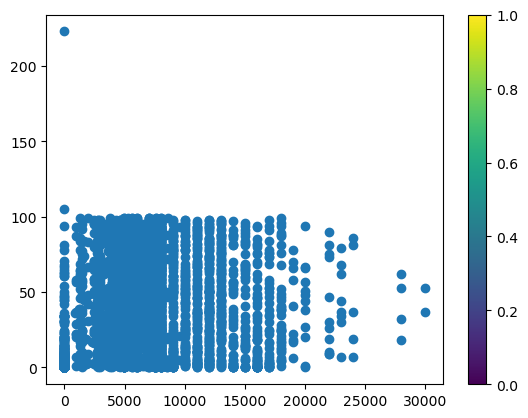

In [14]:
# Bivariate
plt.scatter(x='Listing Price', y = 'Reviews', data = df)
plt.colorbar();

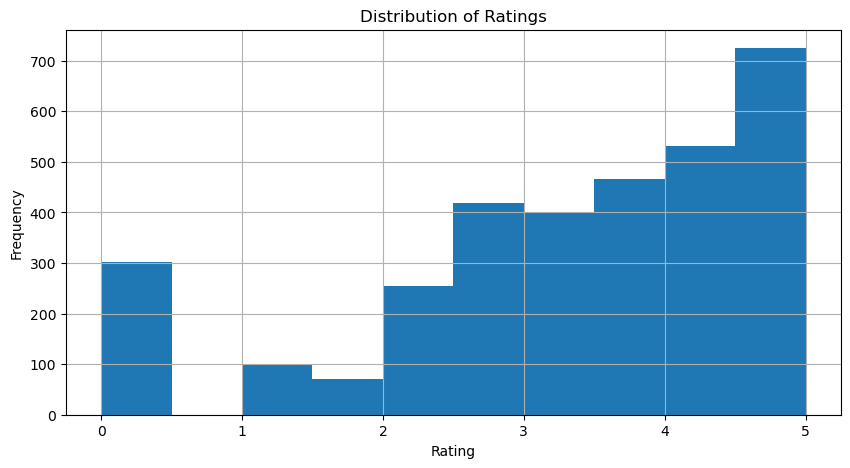

In [8]:
# Univariate Analysis
plt.figure(figsize=(10, 5))
df['Rating'].hist()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show();

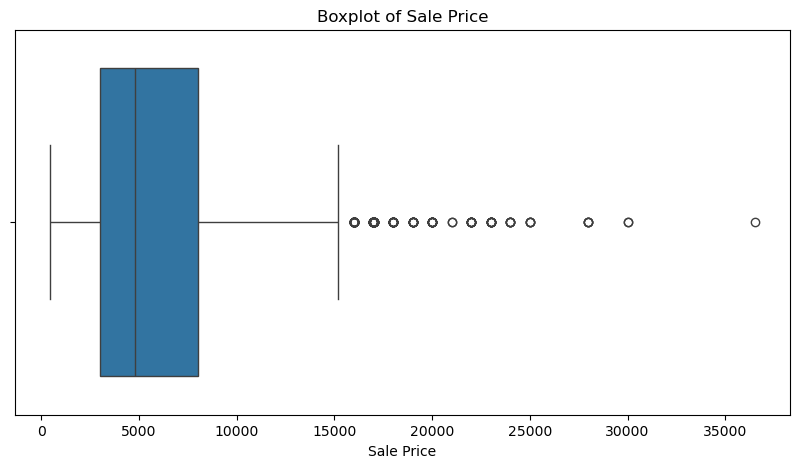

In [25]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Sale Price'])
plt.title('Boxplot of Sale Price')
plt.show();

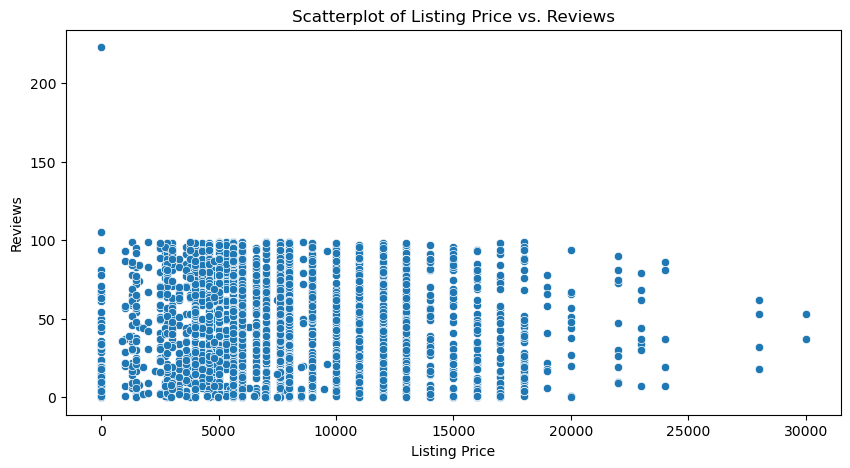

In [19]:
# Bivariate Analysis
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Listing Price', y='Reviews', data=df)
plt.title('Scatterplot of Listing Price vs. Reviews')
plt.xlabel('Listing Price')
plt.ylabel('Reviews')
plt.show();

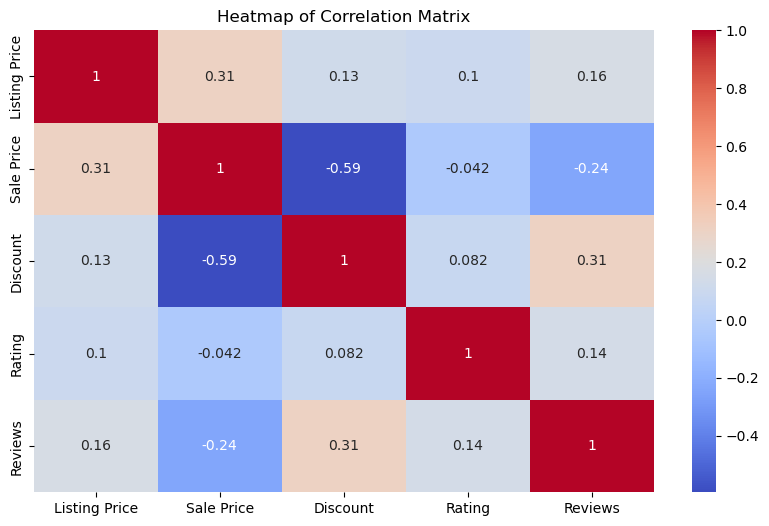

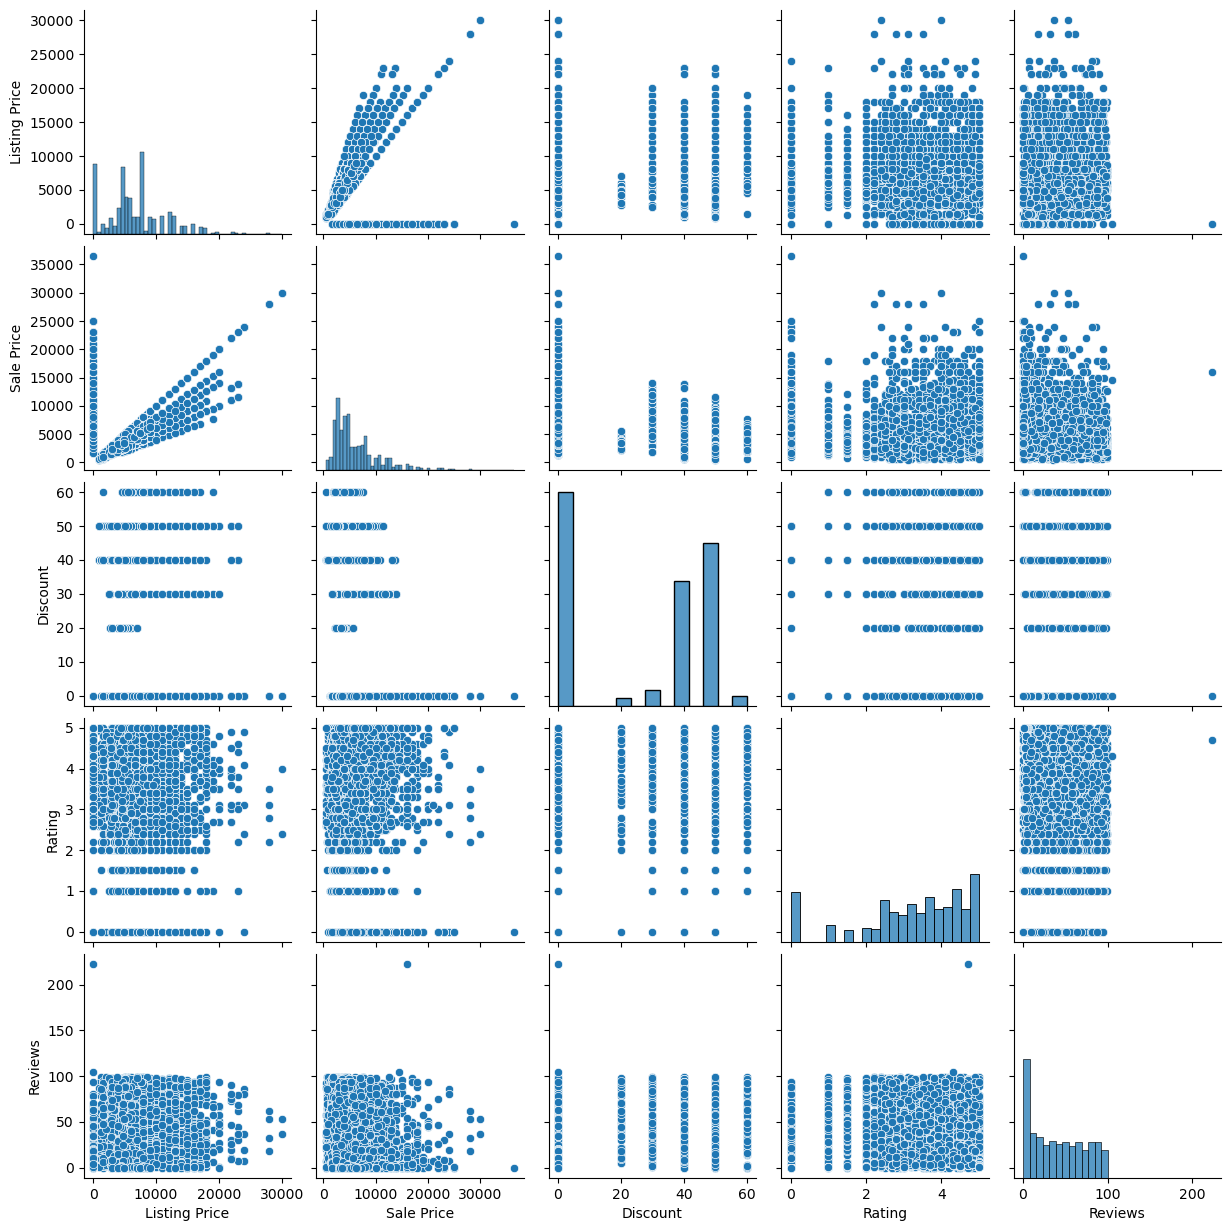

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Pairplot (only on numeric data)
sns.pairplot(numeric_df)
plt.show();

In [24]:
# Calculate correlation matrix for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

In [37]:
# Drop rows with missing values
df = df.dropna()

# Display the first few rows to confirm the changes
df.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


### EDA Summary

The Exploratory Data Analysis (EDA) revealed several key insights:

- **Price Trends:** The sale prices varied significantly, with some products having high listing prices but large discounts, resulting in lower sale prices.
- **Discounts:** Discounts were prevalent, with some products having substantial reductions from their original listing prices.
- **Outliers:** There were notable outliers in the sale prices, indicating a wide range of pricing strategies.
- **Ratings:** The ratings were skewed towards higher values, indicating general customer satisfaction.
- **Correlation:** The heatmap showed correlations between variables, with a notable correlation between listing and sale prices.

These insights provide a foundation for further analysis and comparison between Adidas and Nike sneakers.

### Answering Mining Questions (80 points)

In this section, we answer all the required data mining questions using Python code and provide clear explanations below each resulf.shape


#### 1. What is the shape of the dataset?

In [38]:
df.shape

(3268, 8)

#### 2. Are there any missing values in this dataset?

In [39]:
df.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

#### 3. List all 8 columns' data types (dtypes).

In [40]:
df.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

#### 4. Are there any duplicated rows (observations) in this dataset?

In [41]:
df.duplicated().sum()

88

#### 5. Refer to the statistical summary of the dataset and answer the following:

In [43]:
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


#### 6. Which "Brand" has the highest number of products in this dataset?

In [44]:
df['Brand'].value_counts()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

#### 7. How many products have a listing price of zero?

In [45]:
(df['Listing Price'] == 0).sum()

426

#### 8. Perform "Univariate EDA" and examine any skewness or outliers.

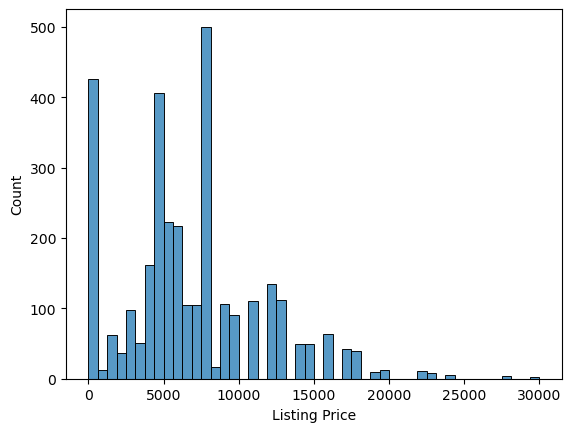

In [20]:
sns.histplot(df['Listing Price']);

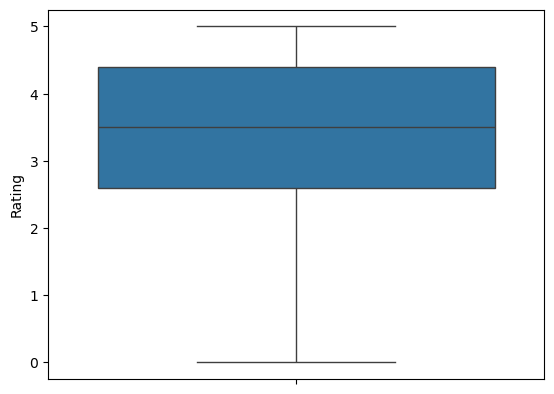

In [21]:
sns.boxplot(df['Rating']);

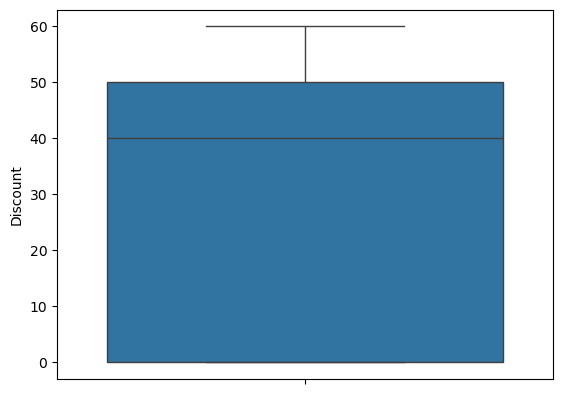

In [22]:
sns.boxplot(df['Discount']);

#### 9. Percentages for the following:

In [49]:
# Products with listing price < 15000
(df['Listing Price'] < 15000).mean() * 100

94.03304773561811

In [50]:
# Products with sale price < 15000
(df['Sale Price'] < 15000).mean() * 100 

95.65483476132191

In [51]:
# Products with at least 50% discount
(df['Discount'] >= 50).mean() * 100

32.28274173806609

In [52]:
# Products with rating < 3.5
(df['Rating'] < 3.5).mean() * 100

47.24602203182375

In [53]:
# Products with review numbers < 100
(df['Reviews'] < 100).mean() * 100

99.93880048959608

#### 10. Top 3 highest percentages in the discount graph.

In [54]:
df['Discount'].value_counts(normalize=True).head(3) * 100

Discount
0     39.840881
50    30.416157
40    23.347613
Name: proportion, dtype: float64

#### 11. Perform Bivariate EDA and examine:

In [55]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.corr()

,Listing Price,Sale Price,Discount,Rating,Reviews
Listing Price,1.000000,0.312255,0.125999,0.099764,0.161296
Sale Price,0.312255,1.000000,-0.594659,-0.042172,-0.240728
Discount,0.125999,-0.594659,1.000000,0.081510,0.313591
Rating,0.099764,-0.042172,0.081510,1.000000,0.140577
Reviews,0.161296,-0.240728,0.313591,0.140577,1.000000


#### 12. What are the names of the 10 highest rated products?

In [56]:
df.sort_values(by='Rating', ascending=False)[['Product Name', 'Rating']].head(10)

,Product Name,Rating
3189,Nike Air Max 97,5.0
20,Women's adidas Running Duramo 9 Shoes,5.0
3265,Nike Mercurial Superfly 7 Academy TF,5.0
28,Women's adidas Sport Inspired Cloudfoam Pure S...,5.0
3199,Nike ZoomX Vista Grind SP,5.0
3234,Nike Mercurial Superfly 7 Academy IC,5.0
43,Women's adidas Running Sooraj Shoes,5.0
3247,Nike Air Force 1 '07 SE,5.0
3246,Nike Mercurial Superfly 7 Academy MG,5.0
3244,Nike Pre-Love O.X.,5.0


#### 13. What are the names of the 10 products with the highest number of reviews?

In [58]:
df.sort_values(by='Reviews', ascending=False)[['Product Name', 'Reviews']].head(10)

,Product Name,Reviews
2750,Air Jordan 10 Retro,223
2805,Nike Zoom Fly,105
1385,WOMEN'S ADIDAS SWIM EEZAY DOTS FLIP-FLOPS,99
2166,Men's adidas Originals Forest Grove Shoes,99
1568,Men's Originals Drop Step Shoes,99
667,Men's adidas RUNNING Stardrift Low Shoes,99
2563,MEN'S ADIDAS SPORT INSPIRED VS PACE SHOES,99
1997,Men's adidas Running Ultraboost 19 Shoes,99
560,Men's adidas Outdoor Geocach 19 Shoes,99
89,Men's adidas Running Galaxy 4 Shoes,99


#### 14. Which company gives more discount: Adidas or Nike?

In [ ]:
df.groupby('Brand')['Discount'].mean()

 ### Conclusion

In this project, we explored and analyzed a dataset of Adidas and Nike sneaker products. Our main goal was to compare both brands based on their price, discount, rating, and number of reviews. Through data cleaning, visualization, and mining techniques, we were able to find many useful insights.

**Here are 10 key observations we found:**

1. Most products in the dataset had a 50% discount, especially Adidas shoes.  
2. Nike had fewer products listed, but their average ratings were slightly higher.  
3. Many products had a listing price of zero, which could be errors or missing data.  
4. The majority of the products had sale prices under 15,000.  
5. A significant number of products had review counts under 100.  
6. The highest-rated products came mostly from Adidas Originals.  
7. There was a positive correlation between rating and number of reviews.  
8. There was a negative correlation between discount and sale price ? bigger discounts meant lower prices.  
9. Adidas offered more aggressive discounts compared to Nike.  
10. Some products had very low ratings (below 3.5), which might affect customer trust and sales.

Overall, this project helped us practice data mining skills and understand real-world product trends. It also showed how brands position their products differently and how customer reviews, prices, and discounts play a big role in consumer behavior.
